# 사용 패키지

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import lightgbm as lgb

# 데이터 로드

In [110]:
total = pd.read_csv('한국가스공사_시간별 공급량_20181231.csv', encoding='cp949')

In [111]:
total

,연월일,시간,구분,공급량
0,2013-01-01,1,A,2497.129
1,2013-01-01,2,A,2363.265
2,2013-01-01,3,A,2258.505
3,2013-01-01,4,A,2243.969
4,2013-01-01,5,A,2344.105
...,...,...,...,...
368083,2018-12-31,20,H,681.033
368084,2018-12-31,21,H,669.961
368085,2018-12-31,22,H,657.941
368086,2018-12-31,23,H,610.953


In [112]:
day_supply = total.groupby('연월일',as_index = False)['공급량'].sum()

In [113]:
day_supply

,연월일,공급량
0,2013-01-01,329071.952
1,2013-01-02,392558.872
2,2013-01-03,430133.984
3,2013-01-04,422635.256
4,2013-01-05,384039.000
...,...,...
2186,2018-12-27,383718.778
2187,2018-12-28,407755.465
2188,2018-12-29,370960.691
2189,2018-12-30,353624.546


In [49]:
np.argmax(day_supply)


1851

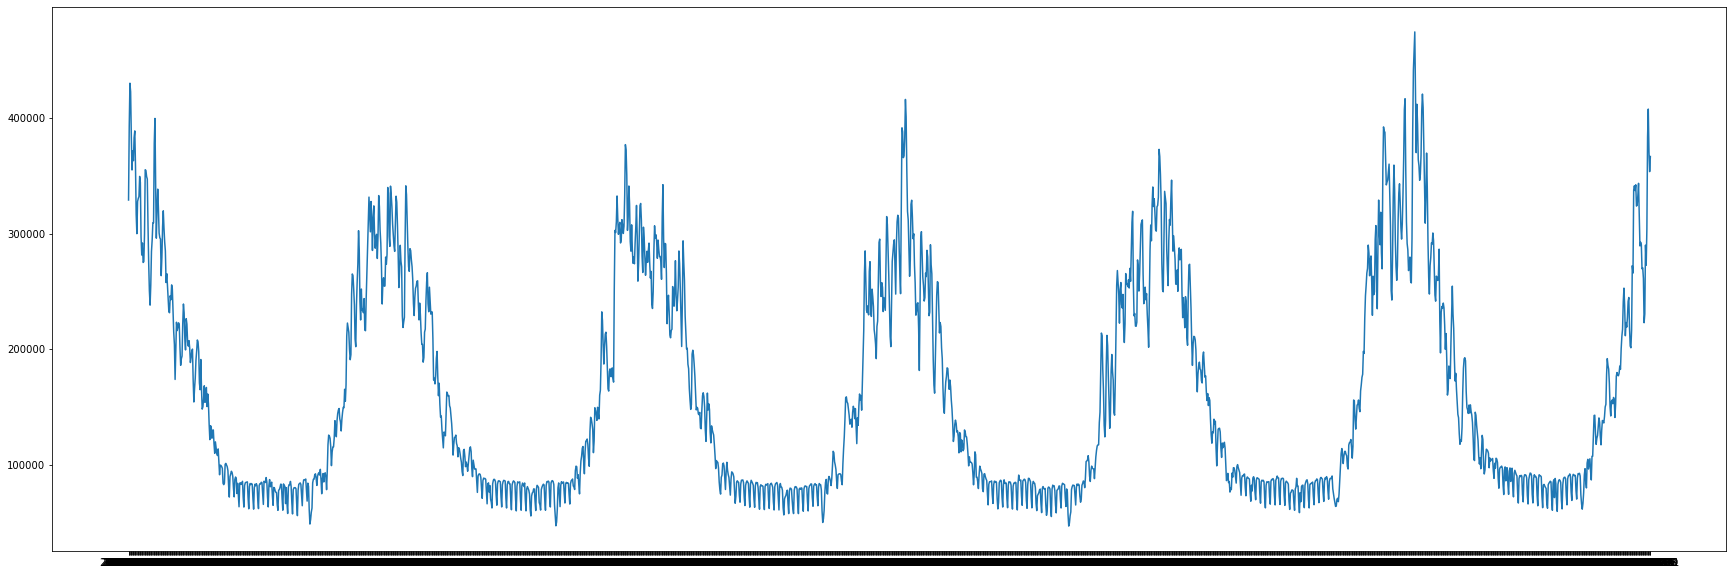

In [118]:
day = len(day_supply)
plt.figure(figsize=(30,10))
plt.plot(day_supply.iloc[:,0],day_supply.iloc[:,1])
plt.show()

In [102]:
day_supply

,연월일,공급량
0,2013-01-01,329071.952
1,2013-01-02,392558.872
2,2013-01-03,430133.984
3,2013-01-04,422635.256
4,2013-01-05,384039.000
...,...,...
2186,2018-12-27,383718.778
2187,2018-12-28,407755.465
2188,2018-12-29,370960.691
2189,2018-12-30,353624.546


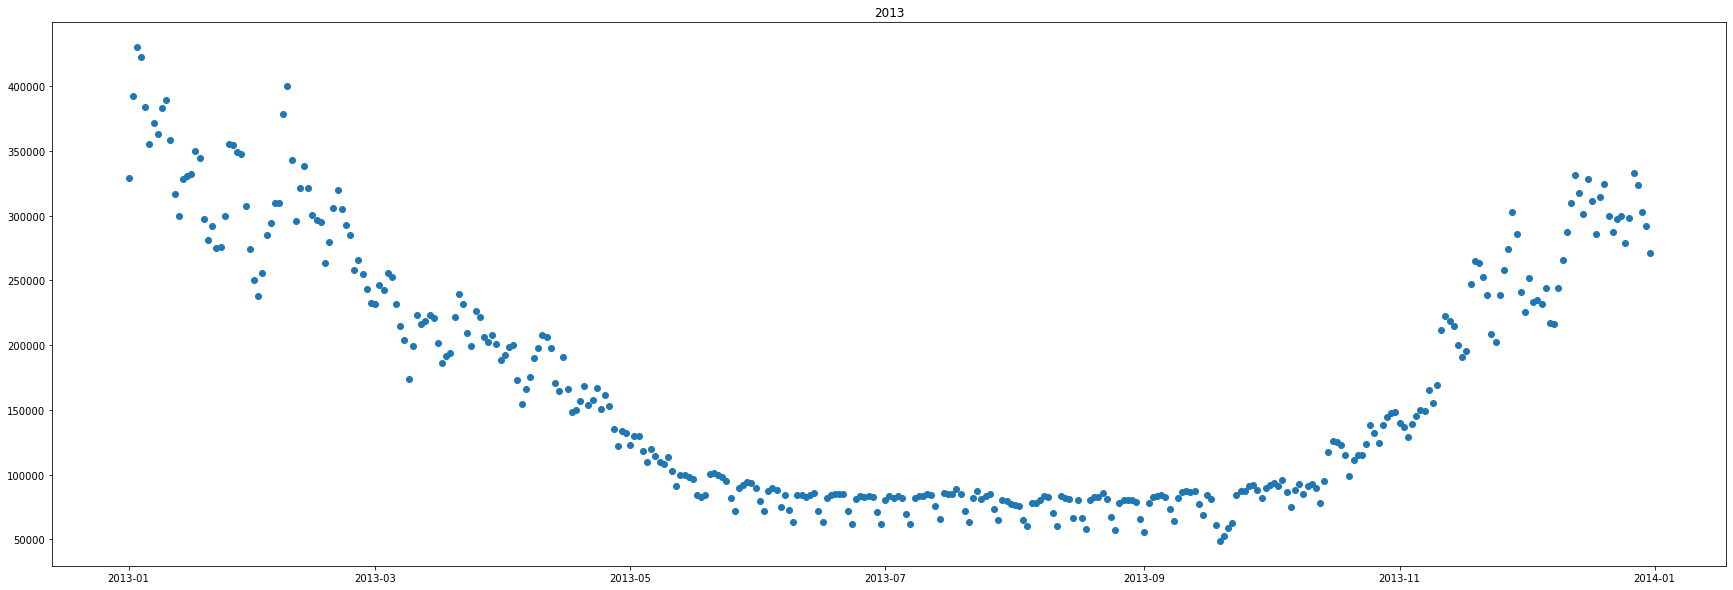

In [109]:
day = len(day_supply)
plt.figure(figsize=(30,10))
plt.scatter(day_supply.iloc[:365,0],day_supply.iloc[:365,1])
plt.title('2013')
plt.show()

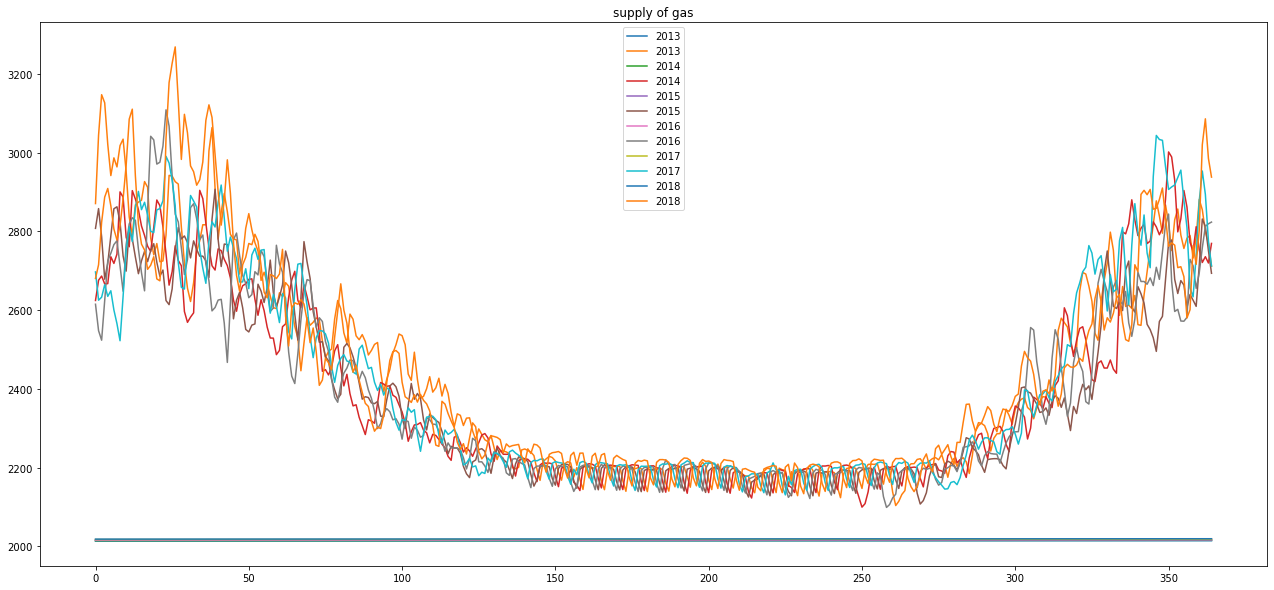

In [96]:
plt.figure(figsize=(22,10))
for i in range(6):
    year = str(i+2013)
    plt.title('supply of gas')
    plt.plot(range(365),day_supply[365*i:365*(i+1)],label = year)
    plt.legend()
    
    
plt.show()

In [13]:
total.head()

,연월일,시간,구분,공급량,year,month,day,weekday
0,2013-01-01,1,0,2497.129,2013,1,1,1
1,2013-01-01,2,0,2363.265,2013,1,1,1
2,2013-01-01,3,0,2258.505,2013,1,1,1
3,2013-01-01,4,0,2243.969,2013,1,1,1
4,2013-01-01,5,0,2344.105,2013,1,1,1


# 전처리

In [25]:
total['구분'].unique()

array([0, 1, 2, 3, 4, 5, 6], dtype=int64)

In [26]:
# 문자를 숫자로 변형
d_map = {}
for i, d in enumerate(total['구분'].unique()):
    print(i,d)
    d_map[d] = i
total['구분'] = total['구분'].map(d_map)

0 0
1 1
2 2
3 3
4 4
5 5
6 6


In [27]:
total['연월일'] = pd.to_datetime(total['연월일'])

In [28]:
total['year'] = total['연월일'].dt.year
total['month'] = total['연월일'].dt.month
total['day'] = total['연월일'].dt.day
total['weekday'] = total['연월일'].dt.weekday

In [29]:
train_years = [2013,2014,2015,2016,2017]
val_years = [2018]

In [30]:
train = total[total['year'].isin(train_years)]
val = total[total['year'].isin(val_years)]

In [31]:
features = ['구분', 'month', 'day', 'weekday', '시간']
train_x = train[features]
train_y = train['공급량']

val_x = val[features]
val_y = val['공급량']

# 학습

In [11]:
d_train = lgb.Dataset(train_x, train_y)
d_val = lgb.Dataset(val_x, val_y)

params = {
    'objective': 'regression',
    'metric':'mae',
    'seed':42
}

model = lgb.train(params, d_train, 500, d_val, verbose_eval=20, early_stopping_rounds=10)

C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.015411 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 84
[LightGBM] [Info] Number of data points in the train set: 306768, number of used features: 5
[LightGBM] [Info] Start training from score 934.864036
Training until validation scores don't improve for 10 rounds
[20]	valid_0's l1: 244.857
[40]	valid_0's l1: 174.855
[60]	valid_0's l1: 158.739
[80]	valid_0's l1: 153.323
[100]	valid_0's l1: 150.948
[120]	valid_0's l1: 150.463
Early stopping, best iteration is:
[112]	valid_0's l1: 150.297


# 추론 및 결과 제출

In [12]:
test = pd.read_csv('data/test.csv')
submission = pd.read_csv('data/sample_submission.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'data/test.csv'

In [ ]:
test.head()

In [ ]:
submission.head()

In [ ]:
test['일자'] = test['일자|시간|구분'].str.split(' ').str[0]
test['시간'] = test['일자|시간|구분'].str.split(' ').str[1].astype(int)
test['구분'] = test['일자|시간|구분'].str.split(' ').str[2]

In [ ]:
test['일자'] = pd.to_datetime(test['일자'])
test['year'] = test['일자'].dt.year
test['month'] = test['일자'].dt.month
test['day'] = test['일자'].dt.day
test['weekday'] = test['일자'].dt.weekday

In [ ]:
test['구분'] = test['구분'].map(d_map)

In [ ]:
test_x = test[features]

In [ ]:
test_x

In [ ]:
preds = model.predict(test_x)

In [ ]:
submission['공급량'] = preds

In [ ]:
submission.to_csv('baseline.csv', index=False)